In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle("cis_survey_data_revised.pkl")
lookUpTable2 = pd.DataFrame(df.dtypes).reset_index()
pd.set_option("display.max_rows", 100)
display(lookUpTable2)

# Create dict to filter by different party groups as needed 
partyGroups = {"partidoNacionalTodos" : ['Podemos', 'PP', 'Ciudadanos', 'Ninguno', np.nan, 'PSOE', 'Otro partido', 'VOX', 'Más País', 'IU', 'Más Madrid', 'SUMAR'],
               "partidoNacionalVIP" : ['Podemos','PP', 'Ciudadanos', 'Ninguno', np.nan, 'PSOE', 'Otro partido', 'VOX'],
               "catalan" : ['CUP', 'ERC', 'JxCat', 'PdeCat'],
               "regionalVipSocios" : ['ERC', 'PRC', 'PNV', 'EH Bildu'],
               "regionalTodos" : ['Compromís', 'Andalucía Por Sí', 'Teruel Existe', 'CUP', 'MÉS (PSM-Entesa)', 'ERC', 'Nueva Canarias','CC-PNC', 'BNG', 'PRC', 'JxCat', 'EH Bildu', 'PdeCat', 'EAJ-PNV', 'Geroa Bai', 'UPN']
               } # Sumar, Yolanda, Más País, Errejon

,index,0
0,ccaa,object
1,prov,object
2,mun,object
3,capital,object
4,tamanoMunicipo,category
5,sexo,object
6,edad,Int64
7,nacionalidad,object
8,preocupCorona,category
9,preocupRusiaUcrania,category


In [2]:
## Selectors
df_pol = range(8,59)
df_social = np.r_[5:8, 59:69]
df_survey = np.r_[0:5, 79:-1]
df_ideol = ["masCercanoPartido", "autodefIdeol1", "autodefIdeal2", "simpatiaHaciaPartido", "intencionVotoPartido1", "intencionVotoPartido2", "posicionIdeolPropia"]
df_gastar = [col for col in df if col.startswith('gastar')]
df_preocup = [col for col in df if col.startswith('preocup')]
df_liderCononce = [col for col in df if col.startswith('liderConoce')]
df_liderValoracion = [col for col in df if col.startswith('liderValoracion')]


[Text(0, 0, '0.0'), Text(1, 0, '0.2'), Text(2, 0, '0.4'), Text(3, 0, '0.6'), Text(4, 0, '0.8'), Text(5, 0, '1.0')]



C:\Users\danie\AppData\Local\Temp\ipykernel_13216\2613746379.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.ax_joint.set_xticklabels(g1.ax_joint.get_xticklabels(), rotation = 65)


['Catholic', 'Other religion', 'Pract. Catholic', 'Agnostic', 'Atheist', 'Indifferent', NaN]
Categories (6, object): ['Pract. Catholic' < 'Catholic' < 'Other religion' < 'Atheist' < 'Agnostic' < 'Indifferent']

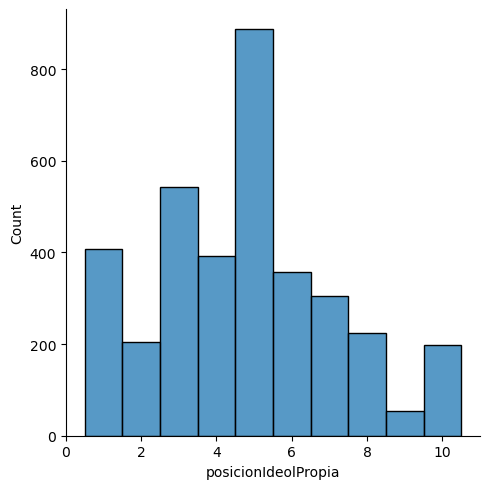

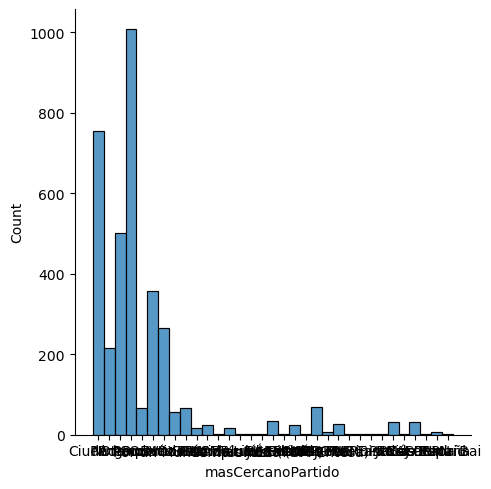

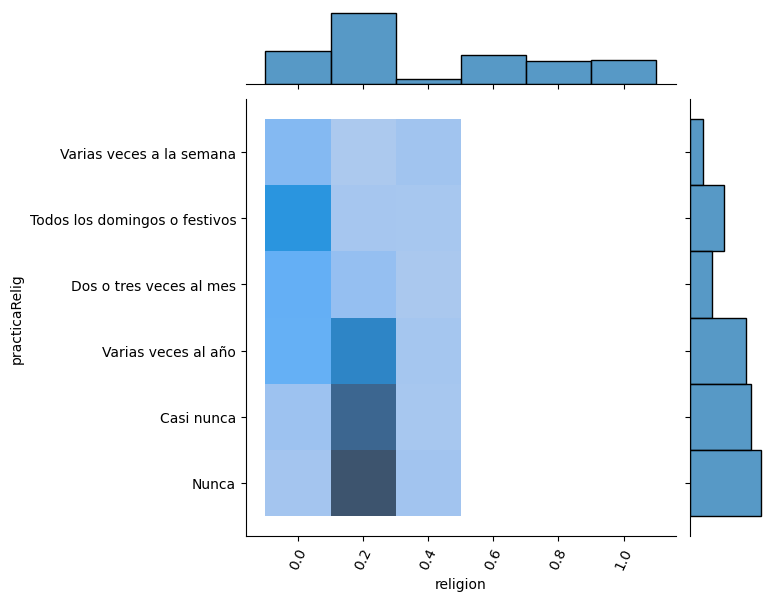

In [3]:
### Ideological affinities
# masCercanoPartido, autodefIdeol1, autodefIdeal2, simpatiaHaciaPartido,
# intencionVotoPartido1, intencionVotoPartido2, posicionIdeolPropia

sns.displot(x=df.posicionIdeolPropia, kind = "hist", discrete = True)
sns.displot(x=df.masCercanoPartido, kind = "hist", discrete = True)

g1 =sns.jointplot(data=df, x="religion", y="practicaRelig", kind="hist")
g1.ax_joint.set_xticklabels(g1.ax_joint.get_xticklabels(), rotation = 65)
print(g1.ax_joint.get_xticklabels())
print()
df.religion.unique()
